In [271]:
# 第一部分「景深擴張」
# M11107S08 王維澤
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [272]:
bg = cv.imread('img/5bg.jpg')
fg = cv.imread('img/5fg.jpg')

# BGR to GRAY, and uint8 to double[0,1]
fg = cv.cvtColor(fg, cv.COLOR_BGR2GRAY).astype(np.float32)/255 
bg = cv.cvtColor(bg, cv.COLOR_BGR2GRAY).astype(np.float32)/255

In [273]:
# High-pass filter (Laplacian)
laplacian = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
fg_h = abs(cv.filter2D(fg,-1,laplacian))
bg_h = abs(cv.filter2D(bg,-1,laplacian))

cv.imwrite('img/fg-hppass.jpg', (fg_h*255).astype(np.uint8))
cv.imwrite('img/bg-hipass.jpg', (bg_h*255).astype(np.uint8))

True

In [274]:
# 製作前景遮罩 mask = fg_hipass - bg_hipass
mask = fg_h - bg_h
# 將遮罩做「均值濾波」，濾鏡尺寸要很大，才不至於使區塊破碎。
img_blur = cv.blur(mask,(20,20))
# 將前景遮罩二值化。
mask_fg = (img_blur>0)
mask_bg = (img_blur<0)


cv.imwrite('img/Foreground-Binary.jpg', (mask_fg*255).astype(np.uint8))
cv.imwrite('img/Background-Binary.jpg', (mask_bg*255).astype(np.uint8))

True

In [275]:
# Relaod images
bg = cv.imread('img/5bg.jpg')
fg = cv.imread('img/5fg.jpg')
# Clear image with binary-mask
fg_clear = cv.merge([fg[:,:,0]*mask_fg, fg[:,:,1]*mask_fg, fg[:,:,2]*mask_fg])
bg_clear = cv.merge([bg[:,:,0]*mask_bg, bg[:,:,1]*mask_bg, bg[:,:,2]*mask_bg])
# clear=fg+bg
clear = fg_clear+bg_clear

# Show clear image


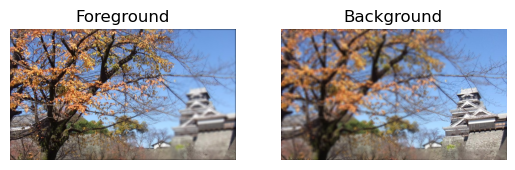

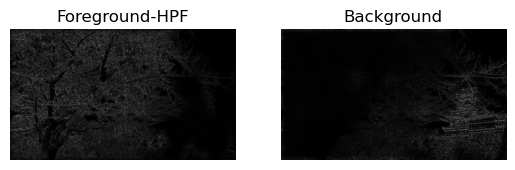

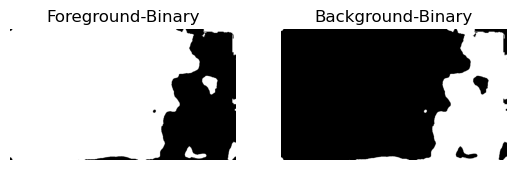

In [276]:
# Show fg_HPF and bg_HPF
fig = plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title("Foreground")
plt.imshow(cv.cvtColor(fg, cv.COLOR_BGR2RGB))
plt.subplot(122)
plt.axis('off')
plt.title("Background")
plt.imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB))
fig = plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title("Foreground-HPF")
plt.imshow(fg_h,"gray")
plt.subplot(122)
plt.axis('off')
plt.title("Background-HPF")
plt.imshow(bg_h,"gray")
fig = plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title("Foreground-Binary")
plt.imshow(mask_fg,"gray")
plt.subplot(122)
plt.axis('off')
plt.title("Background-Binary")
plt.imshow(mask_bg,"gray")

False

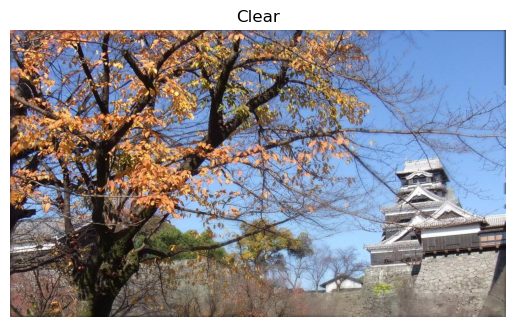

In [277]:
fig = plt.figure()
plt.axis('off')
plt.title("Clear")
plt.imshow(cv.cvtColor(clear, cv.COLOR_BGR2RGB))

cv.imwrite('img/景深擴增影像.jpg', clear)